*** Use when there is skewed shape diagrame ******<br>
<h3>Formula</h3>
->upper:- Q3 + 1.5*IQR<br>
->lower:- Q1 - 1.5*IQR<br>
=> IQR = Q3 - Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<h3>Before IQR</h3>

<Axes: ylabel='placement_exam_marks'>

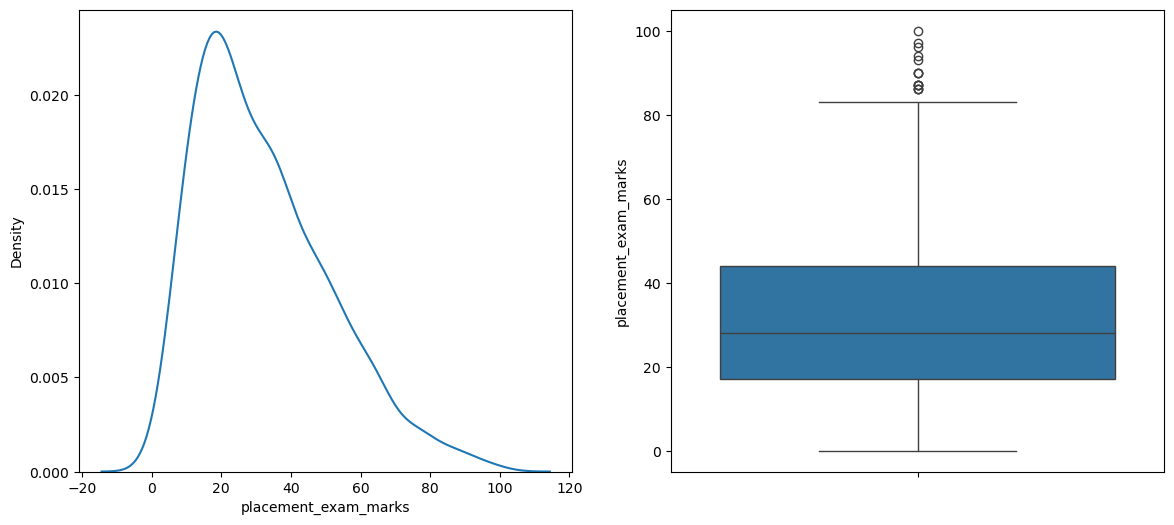

In [5]:
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["placement_exam_marks"],ax=ax1)
sns.boxplot(df["placement_exam_marks"],ax=ax2)

<h3>IQR</h3>

In [8]:
Q3 = df["placement_exam_marks"].quantile(0.75)
Q1 = df["placement_exam_marks"].quantile(0.25)
IQR = Q3 - Q1
upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

df[(df["placement_exam_marks"]<lower) | (df["placement_exam_marks"]>upper)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


<h3>trimming</h3>

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]


<Axes: ylabel='placement_exam_marks'>

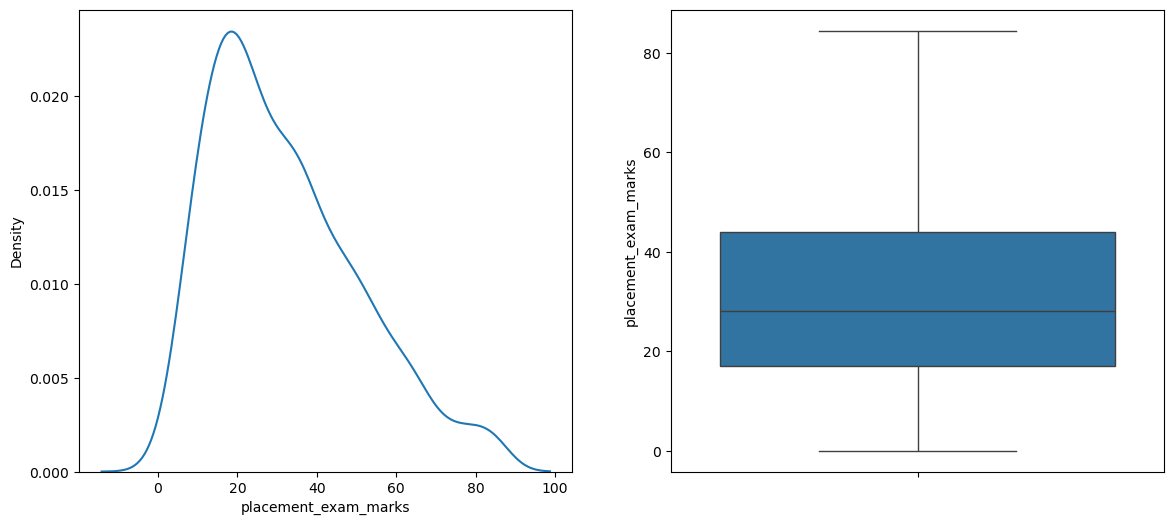

In [19]:
new_df = df[(df["placement_exam_marks"]>=lower) & (df["placement_exam_marks"]<=upper)]
print(new_df)
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(new_df["placement_exam_marks"],ax=ax1)
sns.boxplot(new_df["placement_exam_marks"],ax=ax2)

<h3>ca</h3>

<Axes: ylabel='placement_exam_marks'>

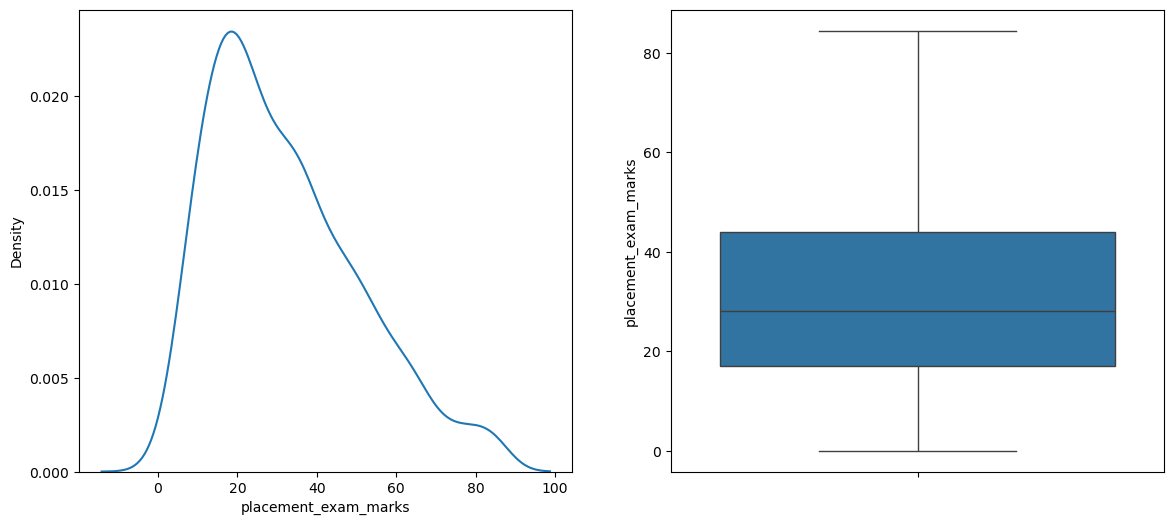

In [15]:
df["placement_exam_marks"]=np.where(
    df["placement_exam_marks"]<lower,
    lower,
    np.where(
        df["placement_exam_marks"]>upper,
        upper,
        df["placement_exam_marks"]
    )
)
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["placement_exam_marks"],ax=ax1)
sns.boxplot(df["placement_exam_marks"],ax=ax2)